# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Redes Neurais e Deep Learning</span>


## Taxa de Aprendizado

*Roseli Aparecida Francelin Romero*<br>
*ICMC/USP São Carlos*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# carregando datasets do keras
#from tensorflow.keras.datasets import mnist

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# obtendo informações das imagens (resolucao) e dos rótulos (número de classes)
img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))
print(x_train.shape)
print('Classes: ', num_classes)

(60000, 28, 28)
Classes:  10


Temos portando 60 mil exemplos de treinamento

Imagens de tamanho $28\times 28$ e 10 classes.

Agora, o passo ideal é pré-processar as imagens para facilitar o processo de otimização das redes neurais:

1. Normalizar seus valores (para o intervalo 0-1)
2. Alterar a codificação das classes (para one-hot-encoding): teremos 10 neurônios na saída, não apenas 1

In [4]:
# dividir por 255 para obter normalizacao
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Antes da transformação: ", y_train[0])
# transformar categorias em one-hot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Após transformação: ", y_train[0])

Antes da transformação:  9
Após transformação:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Por fim, vamos padronizar o formato de entrada em termos das dimensões (shape) do numpy array de entrada.

Isso vai permitir que o mesmo código utilize diferentes bases de dados, com um ou mais canais de cor

In [5]:
# verifica imagens da base de dados tem 3 canais (RGB) ou apenas 1 (escala de cinza)
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formata o array de forma a encontrar o formato da entrada (input_shape)
# se a dimensão dos canais vem primeiro ou após a imagem
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

print("Shape: ", input_shape)

Shape:  (28, 28, 1)


### Tudo pronto, agora vamos começar


In [6]:
def my_cnn():
    CNN = keras.Sequential()
    CNN.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=input_shape))
    CNN.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    CNN.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'))
    CNN.add(keras.layers.Conv2D(128, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'))
    CNN.add(keras.layers.Conv2D(128, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
    CNN.add(keras.layers.Flatten())
    CNN.add(keras.layers.Dense(10, activation='softmax'))
    return CNN

Definindo sementes e um subconjunto menor para testarmos


In [7]:
# as sementes ajudam a ter resultados reproduzíveis
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

epochs = 20
batch_size=32
x_subset = x_train[:5000]
y_subset = y_train[:5000]

### 1) Modelo convencional com parâmetros padrão (learning rate fixo)

In [8]:
CNN1 = my_cnn()
CNN1.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

2022-11-07 18:26:14.642969: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
hist1 = CNN1.fit(x_subset, y_subset,
                    batch_size=batch_size,
                    epochs=epochs, validation_data=(x_test,y_test))

2022-11-07 18:26:15.096049: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
157/157 [==============================] - 4s 22ms/step - loss: 2.2673 - accuracy: 0.2124 - val_loss: 2.2188 - val_accuracy: 0.2757
Epoch 2/20
157/157 [==============================] - 3s 19ms/step - loss: 1.9563 - accuracy: 0.3730 - val_loss: 1.5026 - val_accuracy: 0.4231
Epoch 3/20
157/157 [==============================] - 3s 20ms/step - loss: 1.1495 - accuracy: 0.5826 - val_loss: 1.0881 - val_accuracy: 0.5811
Epoch 4/20
157/157 [==============================] - 3s 19ms/step - loss: 0.9447 - accuracy: 0.6584 - val_loss: 0.9841 - val_accuracy: 0.6524
Epoch 5/20
157/157 [==============================] - 3s 20ms/step - loss: 0.8528 - accuracy: 0.6910 - val_loss: 1.3655 - val_accuracy: 0.6096
Epoch 6/20
157/157 [==============================] - 3s 20ms/step - loss: 0.7958 - accuracy: 0.7156 - val_loss: 0.8172 - val_accuracy: 0.7040
Epoch 7/20
157/157 [==============================] - 4s 25ms/step - loss: 0.7480 - accuracy: 0.7284 - val_loss: 0.7773 - val_accuracy: 0.7059

2) Aumentando (demais) o learning rate

In [10]:
seed(1)
set_seed(2)
print("Modelo2")
CNN2 = my_cnn()
CNN2.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.600),
              metrics=['accuracy'])

hist2 = CNN2.fit(x_subset, y_subset,
                    batch_size=batch_size,
                    epochs=epochs, validation_data=(x_test,y_test),
                    verbose=1)

Modelo2
Epoch 1/20


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


157/157 [==============================] - 4s 24ms/step - loss: 1.5916 - accuracy: 0.4140 - val_loss: 2.4356 - val_accuracy: 0.3295
Epoch 2/20
157/157 [==============================] - 3s 19ms/step - loss: 0.9754 - accuracy: 0.6530 - val_loss: 0.9589 - val_accuracy: 0.6405
Epoch 3/20
157/157 [==============================] - 3s 20ms/step - loss: 0.6406 - accuracy: 0.7620 - val_loss: 0.6729 - val_accuracy: 0.7559
Epoch 4/20
157/157 [==============================] - 3s 19ms/step - loss: 0.5674 - accuracy: 0.7866 - val_loss: 0.6575 - val_accuracy: 0.7568
Epoch 5/20
157/157 [==============================] - 3s 20ms/step - loss: 0.5492 - accuracy: 0.7986 - val_loss: 0.7584 - val_accuracy: 0.7383
Epoch 6/20
157/157 [==============================] - 3s 20ms/step - loss: 0.4950 - accuracy: 0.8186 - val_loss: 0.6512 - val_accuracy: 0.7841
Epoch 7/20
157/157 [==============================] - 3s 20ms/step - loss: 0.4576 - accuracy: 0.8296 - val_loss: 0.6263 - val_accuracy: 0.7491
Epoch 8/20

3) Adicionando momentum com peso 0.9

In [11]:
tf.keras.backend.clear_session()
seed(1)
set_seed(2)
print("Modelo 3")
CNN3 = my_cnn()
CNN3.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.02,momentum=0.9),
              metrics=['accuracy'])

hist3 = CNN3.fit(x_subset, y_subset,
                    batch_size=batch_size,
                    epochs=epochs, validation_data=(x_test,y_test),
                    verbose=1)

Modelo 3
Epoch 1/20
157/157 [==============================] - 4s 21ms/step - loss: 1.2582 - accuracy: 0.5556 - val_loss: 0.7384 - val_accuracy: 0.7099
Epoch 2/20
157/157 [==============================] - 3s 20ms/step - loss: 0.6832 - accuracy: 0.7434 - val_loss: 0.7161 - val_accuracy: 0.7461
Epoch 3/20
157/157 [==============================] - 3s 21ms/step - loss: 0.5735 - accuracy: 0.7860 - val_loss: 0.5813 - val_accuracy: 0.7801
Epoch 4/20
157/157 [==============================] - 3s 20ms/step - loss: 0.5145 - accuracy: 0.8100 - val_loss: 0.5513 - val_accuracy: 0.7932
Epoch 5/20
157/157 [==============================] - 3s 20ms/step - loss: 0.4658 - accuracy: 0.8260 - val_loss: 0.5525 - val_accuracy: 0.7958
Epoch 6/20
157/157 [==============================] - 3s 20ms/step - loss: 0.4284 - accuracy: 0.8420 - val_loss: 0.5474 - val_accuracy: 0.8053
Epoch 7/20
157/157 [==============================] - 3s 20ms/step - loss: 0.4025 - accuracy: 0.8472 - val_loss: 0.5002 - val_accurac

4) Tentando encontrar um meio termo: learning rate (não tão) maior, com decaimento da taxa de aprendizado


In [12]:
tf.keras.backend.clear_session()
seed(1)
set_seed(2)
CNN4 = my_cnn()
CNN4.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.25),
              metrics=['accuracy'])

print("Taxa inicial = ", round(CNN4.optimizer.lr.numpy(), 4))

Taxa inicial =  0.25


Criando uma função "callback" para definir uma modificação no learning rate ao longo das épocas

In [13]:
def scheduler(epoch, lr):
  print("Learning rate atual = ", lr)
  if epoch < 5:
    return lr
  else:
    return np.round(lr * tf.math.exp(-0.2),3)

callbacklr = tf.keras.callbacks.LearningRateScheduler(scheduler)

hist4 = CNN4.fit(x_subset, y_subset,
                    batch_size=batch_size, epochs=epochs, 
                    callbacks=[callbacklr], validation_data=(x_test,y_test),
                    verbose=1)

Epoch 1/20
Learning rate atual =  0.25
157/157 [==============================] - 4s 23ms/step - loss: 1.3271 - accuracy: 0.5246 - val_loss: 1.0328 - val_accuracy: 0.5975
Epoch 2/20
Learning rate atual =  0.25
157/157 [==============================] - 3s 20ms/step - loss: 0.7050 - accuracy: 0.7398 - val_loss: 1.0640 - val_accuracy: 0.6385
Epoch 3/20
Learning rate atual =  0.25
157/157 [==============================] - 3s 21ms/step - loss: 0.5920 - accuracy: 0.7848 - val_loss: 0.7109 - val_accuracy: 0.7503
Epoch 4/20
Learning rate atual =  0.25
157/157 [==============================] - 3s 20ms/step - loss: 0.5194 - accuracy: 0.8074 - val_loss: 0.6304 - val_accuracy: 0.7624
Epoch 5/20
Learning rate atual =  0.25
157/157 [==============================] - 3s 20ms/step - loss: 0.4694 - accuracy: 0.8232 - val_loss: 0.7728 - val_accuracy: 0.7504
Epoch 6/20
Learning rate atual =  0.25
157/157 [==============================] - 3s 20ms/step - loss: 0.4176 - accuracy: 0.8398 - val_loss: 0.71

Vamos comparar a função perda calculada pelas 4 redes profundas.

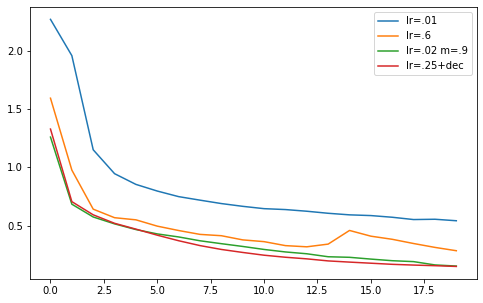

In [14]:
plt.figure(figsize=(8,5))
plt.plot(hist1.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.plot(hist4.history['loss'])
plt.legend(["lr=.01", "lr=.6", "lr=.02 m=.9","lr=.25+dec"], loc="upper right")

Vamos comparar as acurácias nos conjuntos de treino e val. para as CNN1 e CNN2 

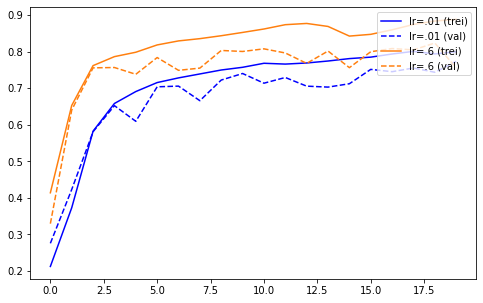

In [15]:
plt.figure(figsize=(8,5))
plt.plot(hist1.history['accuracy'], 'b')
plt.plot(hist1.history['val_accuracy'], 'b--')
plt.plot(hist2.history['accuracy'], color='tab:orange')
plt.plot(hist2.history['val_accuracy'], color='tab:orange', linestyle='--')
plt.legend(["lr=.01 (trei)","lr=.01 (val)","lr=.6 (trei)","lr=.6 (val)"], loc="upper right")

Vamos comparar  as acurácias nos conjuntos de treino e val. para a CNN3 e CNN4.


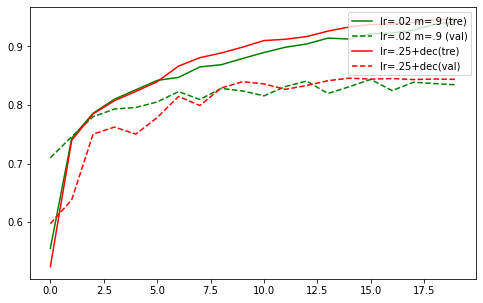

In [16]:
plt.figure(figsize=(8,5))
plt.plot(hist3.history['accuracy'], 'g')
plt.plot(hist3.history['val_accuracy'], 'g--')
plt.plot(hist4.history['accuracy'], 'r')
plt.plot(hist4.history['val_accuracy'], 'r--')
plt.legend(["lr=.02 m=.9 (tre)","lr=.02 m=.9 (val)","lr=.25+dec(tre)","lr=.25+dec(val)"], loc="upper right")